In [1]:
import numpy as np
import matplotlib.pyplot as plt

from environments import GridWorldEnv
from agents.monte_carlo import OnPolicy_Agent, OffPolicy_Agent

In [2]:
# matplotlib styles
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 7)

In [3]:
# function for playing until terminal state
def play(env, agent): 
    episode = []
    done = False
    s = env.reset()

    while not done:
        a = agent.get_action(s)
        t, r, done, _ = env.step(a)
        
        episode.append([s, a, r, t])
        s = t
    else:
        return episode

In [4]:
# evaluates avg. episodes lengths and avg. max updated over given training runs
def evaluate(env, agent, runs = 200, episodes = 1000):
    total_episode_lengths = []
    max_episode_updates = []

    for run in range(runs):
        episode_lengths = []
        agent.reset()

        for episode in range(episodes):
            episode = play(env, agent)
            agent.learn(episode)
            episode_lengths.append(len(episode))
        
        total_episode_lengths.append(episode_lengths)
        max_episode_updates.append(agent.max_updates)

    return (np.mean(np.array(total_episode_lengths), axis = 0), np.mean(np.array(max_episode_updates), axis = 0))

In [5]:
# function for plotting agent episode lengths and max updates
def plot_agents(history, connected = False):
    if not connected:
        fig, axs = plt.subplots(len(history), 2)

        handles = []
        labels = []

        axs[0, 0].set_title('Avg. Steps per Episode\n')
        axs[0, 1].set_title('Avg. max Update per Episode\n')

        row = 0
        for agent in history.items():
            name = agent[0]
            values = agent[1]
            labels.append(agent[0])

            col = 0
            for value in values.items():
                handles.append(axs[row, col].plot(value[1], color = f'C{row}', label = name))
                col += 1
            
            row += 1

        plt.legend(handles = list([l[0] for l in handles])[::2], labels = labels, loc = 'lower center', ncol = len(history), bbox_to_anchor = (-0.1, -0.6))
        plt.show(fig);
    
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2)

        for agent, values in history.items():
            ax1.plot(values['lengths'], label = agent)

        ax1.set(xlabel = 'Episodes', ylabel = 'Avg. Steps per Episode')
        ax1.legend(loc = 'best')

        for agent, values in history.items():
            ax2.plot(values['updates'], label = agent)

        ax2.set(xlabel = 'Episodes', ylabel = 'Avg. max Update per Episode')
        ax2.legend(loc = 'best')

        plt.show(fig);

In [6]:
# define environment
env = GridWorldEnv()

# history dict to store avg. episode lengths and avg. max updates of evaluated agents
history = {}

In [7]:
%%time

# evaluate every-visit on-policy agent
agent = OnPolicy_Agent(state_space = env.state_space, action_space = env.action_space, epsilon = 0.1, first_visit = False)
lengths, updates = evaluate(env = env, agent = agent)

history.update({
    'Every-Visit On-Policy' : {
        'lengths' : lengths,
        'updates' : updates
    }
})

CPU times: user 6min 8s, sys: 1.36 s, total: 6min 10s
Wall time: 6min 9s


In [8]:
%%time

# evaluate first-visit on-policy agent
agent = OnPolicy_Agent(state_space = env.state_space, action_space = env.action_space, epsilon = 0.1, first_visit = True)
lengths, updates = evaluate(env = env, agent = agent)

history.update({
    'First-Visit On-Policy' : {
        'lengths' : lengths,
        'updates' : updates
    }
})


CPU times: user 3min 37s, sys: 652 ms, total: 3min 37s
Wall time: 3min 36s


In [9]:
%%time

# evaluate every-visit off-policy agent
agent = OffPolicy_Agent(state_space = env.state_space, action_space = env.action_space, epsilon = 0, first_visit = False)
lengths, updates = evaluate(env = env, agent = agent)

history.update({
    'Every-Visit Off-Policy' : {
        'lengths' : lengths,
        'updates' : updates
    }
})

CPU times: user 14min 30s, sys: 7.52 s, total: 14min 38s
Wall time: 14min 35s


In [10]:
%%time

# evaluate first-visit off-policy agent
agent = OffPolicy_Agent(state_space = env.state_space, action_space = env.action_space, epsilon = 0, first_visit = True)
lengths, updates = evaluate(env = env, agent = agent)

history.update({
    'First-Visit Off-Policy' : {
        'lengths' : lengths,
        'updates' : updates
    }
})

CPU times: user 13min 29s, sys: 4.95 s, total: 13min 34s
Wall time: 13min 31s


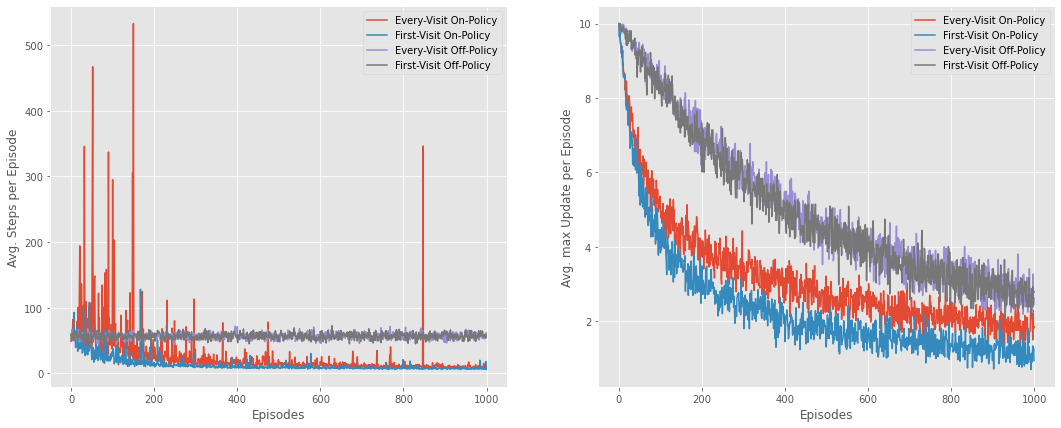

In [11]:
# show avg. steps per episode and avg. max updates for all agents combined
plot_agents(history, connected = True)

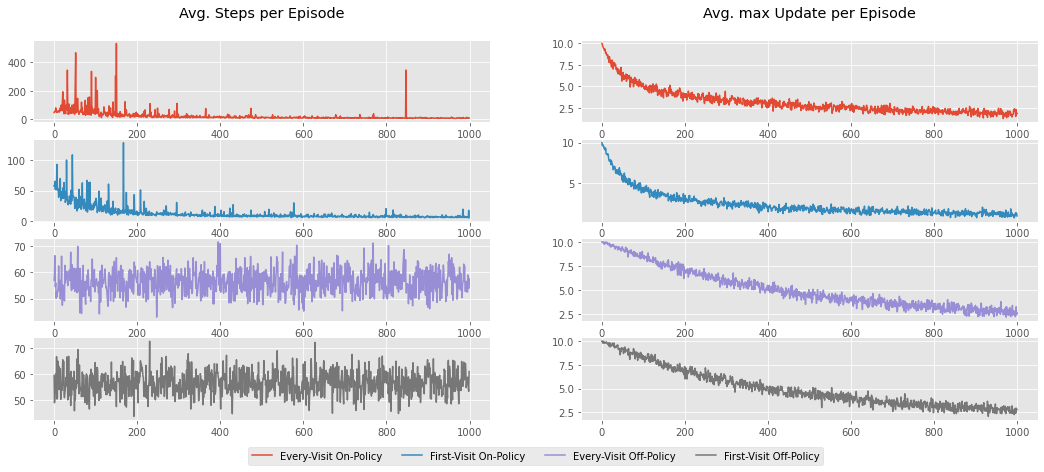

In [12]:
# show avg. steps per episode and avg. max updates for each agent separately
plot_agents(history, connected = False)